In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

In [5]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
plt.style.use('classic')
from matplotlib.patches import Rectangle
import pickle
from cmocean import cm
import warnings
import netCDF4 as nc
import sys
sys.path.append('../pyscripts/bylayer_extract/')
import extract_bylayer_mean_BOXMASK as ebmBOX 
from importlib import reload
from salishsea_tools import viz_tools

%matplotlib inline
warnings.simplefilter('ignore')

plt.rcParams.update({'font.size': 13,
                     'xtick.labelsize' : 13,
                     'ytick.labelsize' : 13})

### [A] Map definition and station definition

Text(0.5, 1.0, 'individual stations')

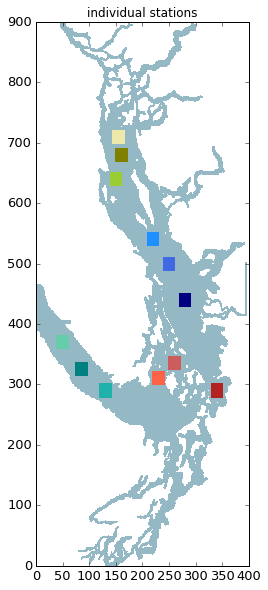

In [6]:
jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'
jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

cs_x = 250; cs_y = 500; cs_col = 'royalblue'
cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

haro_x = 230; haro_y = 310; haro_col = 'tomato'
haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


ns_x = 160; ns_y = 680; ns_col = 'olive'
ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'


w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
pco2 = w['model_output']['pCO2'][:]
pco2[pco2>2e5] = np.nan
pco2[pco2<2000] = 500
fact = 1.5
fig = plt.figure(figsize=(12*fact,6.5*fact))

ax0 = fig.add_subplot(1,2,1)
#toba and bute

im = ax0.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax0)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
ax0.add_patch(rect_jdf)

rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
ax0.add_patch(rect_haro)

rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
ax0.add_patch(rect_cs)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
ax0.add_patch(rect_ns)

ax0.set_title('individual stations')




reload(ebmBOX)

    # reload(ebmBOX)

    # #(start, end, ftype, sdir, varname, fname, y, x)
    # pkldir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
    # start = '2015-01-01' #start of timeperiod
    # end = '2015-12-31' #end of timeperiod (typically a year)
    # ftype = 'carp' #type of model result .nc 
    # sdir = 'MAIN/BR_3rd_2015' #where under directory tree do we find ncs 
    # varname = 'dissolved_inorganic_carbon' #name of variable
    # fname = pkldir + 'BR3_DIC_means_cs2_BOX'
    # y = cs2_y; x = cs2_x
    # ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )

run for PI4, BR3 for the above 12 stations, usage case above


#### LOAD PKLS OF ABOVE EXTRACTED QUANTITIES

In [7]:
#extract means for BR1-BR3, get fraser discharge
#var
BR1_var = pickle.load(open('../pkls/BR1_DIC_means_inletsIN.pkl' , 'rb')) 
BR2_var = pickle.load(open('../pkls/BR2_DIC_means_inletsIN.pkl' , 'rb')) 
BR3_var = pickle.load(open('../pkls/BR3_DIC_means_inletsIN.pkl' , 'rb')) 

PI1_var = pickle.load(open('../pkls/PI1_DIC_means_inletsIN.pkl' , 'rb')) 
PI2_var = pickle.load(open('../pkls/PI2_DIC_means_inletsIN.pkl' , 'rb')) 
PI3rr_var = pickle.load(open('../pkls/PI3rr_DIC_means_inletsIN.pkl' , 'rb')) 
PI4_var = pickle.load(open('../pkls/PI4_DIC_means_inletsIN.pkl' , 'rb')) 
PI4_var[PI4_var == 0] = np.nan
Fraser_discharge = pickle.load(open('../pkls/Fraser_2015_year_runoff_m3_s.pkl', 'rb'))  



mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
depth = mesh['gdept_1d'][:]
days_in = np.arange(1,366,1)
#make a long 3-year dataset to be able to compare spinup progress for BR run


#### load all DIC and salinity data

In [8]:
BR3_var_jdf = pickle.load(open('../pkls/BR3_DIC_means_jdf_BOX.pkl','rb'))
PI4_var_jdf = pickle.load(open('../pkls/PI4_DIC_means_jdf_BOX.pkl','rb'))
BR3_var_cs = pickle.load(open('../pkls/BR3_DIC_means_cs_BOX.pkl','rb'))
PI4_var_cs = pickle.load(open('../pkls/PI4_DIC_means_cs_BOX.pkl','rb'))
BR3_var_ns = pickle.load(open('../pkls/BR3_DIC_means_ns_BOX.pkl','rb'))
PI4_var_ns = pickle.load(open('../pkls/PI4_DIC_means_ns_BOX.pkl','rb'))
BR3_var_haro = pickle.load(open('../pkls/BR3_DIC_means_haro_BOX.pkl','rb'))
PI4_var_haro = pickle.load(open('../pkls/PI4_DIC_means_haro_BOX.pkl','rb'))

BR3_var_jdf2 = pickle.load(open('../pkls/BR3_DIC_means_jdf2_BOX.pkl','rb'))
PI4_var_jdf2 = pickle.load(open('../pkls/PI4_DIC_means_jdf2_BOX.pkl','rb'))
BR3_var_cs2 = pickle.load(open('../pkls/BR3_DIC_means_cs2_BOX.pkl','rb'))
PI4_var_cs2 = pickle.load(open('../pkls/PI4_DIC_means_cs2_BOX.pkl','rb'))
BR3_var_ns2 = pickle.load(open('../pkls/BR3_DIC_means_ns2_BOX.pkl','rb'))
PI4_var_ns2 = pickle.load(open('../pkls/PI4_DIC_means_ns2_BOX.pkl','rb'))
BR3_var_haro2 = pickle.load(open('../pkls/BR3_DIC_means_haro2_BOX.pkl','rb'))
PI4_var_haro2 = pickle.load(open('../pkls/PI4_DIC_means_haro2_BOX.pkl','rb'))

BR3_var_jdf3 = pickle.load(open('../pkls/BR3_DIC_means_jdf3_BOX.pkl','rb'))
PI4_var_jdf3 = pickle.load(open('../pkls/PI4_DIC_means_jdf3_BOX.pkl','rb'))
BR3_var_cs3 = pickle.load(open('../pkls/BR3_DIC_means_cs3_BOX.pkl','rb'))
PI4_var_cs3 = pickle.load(open('../pkls/PI4_DIC_means_cs3_BOX.pkl','rb'))
BR3_var_ns3 = pickle.load(open('../pkls/BR3_DIC_means_ns3_BOX.pkl','rb'))
PI4_var_ns3 = pickle.load(open('../pkls/PI4_DIC_means_ns3_BOX.pkl','rb'))
BR3_var_haro3 = pickle.load(open('../pkls/BR3_DIC_means_haro3_BOX.pkl','rb'))
PI4_var_haro3 = pickle.load(open('../pkls/PI4_DIC_means_haro3_BOX.pkl','rb'))

BR3_sal_jdf = pickle.load(open('../pkls/BR3_sal_means_jdf_BOX.pkl','rb'))
PI4_sal_jdf = pickle.load(open('../pkls/PI4_sal_means_jdf_BOX.pkl','rb'))
BR3_sal_cs = pickle.load(open('../pkls/BR3_sal_means_cs_BOX.pkl','rb'))
PI4_sal_cs = pickle.load(open('../pkls/PI4_sal_means_cs_BOX.pkl','rb'))
BR3_sal_ns = pickle.load(open('../pkls/BR3_sal_means_ns_BOX.pkl','rb'))
PI4_sal_ns = pickle.load(open('../pkls/PI4_sal_means_ns_BOX.pkl','rb'))
BR3_sal_haro = pickle.load(open('../pkls/BR3_sal_means_haro_BOX.pkl','rb'))
PI4_sal_haro = pickle.load(open('../pkls/PI4_sal_means_haro_BOX.pkl','rb'))

BR3_sal_jdf2 = pickle.load(open('../pkls/BR3_sal_means_jdf2_BOX.pkl','rb'))
PI4_sal_jdf2 = pickle.load(open('../pkls/PI4_sal_means_jdf2_BOX.pkl','rb'))
BR3_sal_cs2 = pickle.load(open('../pkls/BR3_sal_means_cs2_BOX.pkl','rb'))
PI4_sal_cs2 = pickle.load(open('../pkls/PI4_sal_means_cs2_BOX.pkl','rb'))
BR3_sal_ns2 = pickle.load(open('../pkls/BR3_sal_means_ns2_BOX.pkl','rb'))
PI4_sal_ns2 = pickle.load(open('../pkls/PI4_sal_means_ns2_BOX.pkl','rb'))
BR3_sal_haro2 = pickle.load(open('../pkls/BR3_sal_means_haro2_BOX.pkl','rb'))
PI4_sal_haro2 = pickle.load(open('../pkls/PI4_sal_means_haro2_BOX.pkl','rb'))

BR3_sal_jdf3 = pickle.load(open('../pkls/BR3_sal_means_jdf3_BOX.pkl','rb'))
PI4_sal_jdf3 = pickle.load(open('../pkls/PI4_sal_means_jdf3_BOX.pkl','rb'))
BR3_sal_cs3 = pickle.load(open('../pkls/BR3_sal_means_cs3_BOX.pkl','rb'))
PI4_sal_cs3 = pickle.load(open('../pkls/PI4_sal_means_cs3_BOX.pkl','rb'))
BR3_sal_ns3 = pickle.load(open('../pkls/BR3_sal_means_ns3_BOX.pkl','rb'))
PI4_sal_ns3 = pickle.load(open('../pkls/PI4_sal_means_ns3_BOX.pkl','rb'))
BR3_sal_haro3 = pickle.load(open('../pkls/BR3_sal_means_haro3_BOX.pkl','rb'))
PI4_sal_haro3 = pickle.load(open('../pkls/PI4_sal_means_haro3_BOX.pkl','rb'))

#### CALCULATE DEPTH-INTEGRATED BIOLOGY

In [9]:
flag ='../pkls/BR3_flagellates_means_inletsIN.pkl'
diat ='../pkls/BR3_diatoms_means_inletsIN.pkl'
cili ='../pkls/BR3_ciliates_means_inletsIN.pkl'
csd = '../pkls/cellsize_alg2.pkl'

flag_mas = pickle.load(open(flag, 'rb'))  
diat_mas = pickle.load(open(diat, 'rb'))
cili_mas = pickle.load(open(cili, 'rb'))

mmask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (mmask['e3t_1d'][:])

mask_broad = np.zeros([40,365])

for i in range(0,365):
    mask_broad[:,i] = depths


flag_mas_mm_m2 = np.nansum((mask_broad*flag_mas),axis = 0)
diat_mas_mm_m2 = np.nansum((mask_broad*diat_mas),axis = 0)
cili_mas_mm_m2 = np.nansum((mask_broad*cili_mas),axis = 0)

### nice plot - PI3rr (commented out)

In [10]:
# ts = 15 # title font
# fs = 13.5 # all other font sizes
# fact = 1
# fig = plt.figure(figsize=(14*fact, 8.5*fact))
# seg = 45
# shift = 2
# lw = 2
# depth = mesh['e3t_0'][0,:,250,250]
# ax1 = plt.subplot2grid((2,3), (0,0), colspan=2, rowspan=1)
# tcm = cm.dense
# for i in range(0,40):
#     zdepth = np.sum(depth[0:i])
#     if i%5 !=0: 
#         ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
#     if i%5 == 0:
#         ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg),\
#                 label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
# ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
# ax1.legend(loc = 'best', fontsize = fs)
# plt.xlim([0,365*1])
# plt.grid()
# ax1.set_xlabel('day of year', fontsize = fs-2)
# ax1.set_ylabel('DIC concentration (mmol m$^-3$)', fontsize = fs)
# ax1.set_title('By-layer domain mean DIC concentration', fontsize = ts)


# ax2 = plt.subplot2grid((2,3), (1,0), colspan=2, rowspan=1)
# ax2b =ax2.twinx()
# ax2.plot(days_in,Fraser_discharge,'-k', linewidth = 3, label = 'Fraser river discharge')
# ax2.grid()
# #ax2b.plot(days_in,flag_mas_mm_m2,color = 'greenyellow',label ='flagellates')
# #ax2b.plot(days_in,diat_mas_mm_m2,color = 'mediumspringgreen',label ='diatoms')
# #ax2b.plot(days_in,cili_mas_mm_m2,color = 'forestgreen',label ='ciliates')
# ax2b.plot(days_in, flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2,\
#           color = 'darkseagreen', label = 'phytoplankton biomass', linewidth = 3)
# ax2b.fill_between(days_in, np.zeros_like(flag_mas_mm_m2), (flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2), \
#                  color = 'darkseagreen', alpha = 0.2 )

# ax2b.legend(loc = 'best', fontsize = fs)
# ax2.legend(loc = 'upper left', fontsize = fs)
# ax2b.set_ylabel('phytoplankton biomass (mmol N $m^2$)', fontsize = fs)
# ax2.set_xlabel('day of year', fontsize = fs)
# ax2.set_ylabel('Fraser river discharge (m$^3$ s$^{-1}$)', fontsize = fs)
# ax2.set_title('Freshwater discharge and phytoplankton biomass', fontsize = ts)
# plt.xlim([0,365])
# ax2b.set_ylim([0,130])
# ax2.text(0.03, 0.03, 'b)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='bottom')


# ax3 = plt.subplot2grid((2,3), (0,2), colspan=1, rowspan=2)
# ax3.text(0.03, 0.03, 'c)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')
# tcm = cm.deep
# mesh = nc.Dataset('//data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')



# for d in range(0,12):
#     for i in range(0,40):
#         zdepth = np.sum(depth[0:i+1]) 
#         if ((i == 0) & (d ==0)):        
#             ax3.plot((np.nanmean(BR3_var,axis =1)[i]-\
#                       np.nanmean(PI3rr_var,axis=1)[i]),zdepth,\
#                      marker = 'o', color = 'r', markersize = 12, label = 'mean')
#         else:
#             ax3.plot((np.nanmean(BR3_var,axis =1)[i]-\
#                       np.nanmean(PI3rr_var,axis=1)[i]),zdepth,\
#                      marker = 'o', color = 'r', markersize = 12)
#         if i == 0:
#             ax3.plot((BR3_var[i,d*30]-PI3rr_var[i,d*30]),zdepth,\
#                     color = tcm(1.*d/12), marker = 'o', label = 'doy: '+ str(d*30))
#         else:
#             ax3.plot((BR3_var[i,d*30]-PI3rr_var[i,d*30]),zdepth,\
#                     color = tcm(1.*d/12), marker = 'o')

# ax3.set_title('mean extra DIC by depth')
# ax3.invert_yaxis()
# ax3.legend(loc = 'best', fontsize = ts)
# ax3.set_xlabel('extra DIC (mmol $m^{-3}$)')
# ax3.set_ylabel('depth (m)')
# fig.tight_layout()




### [B] nice plot - PI4

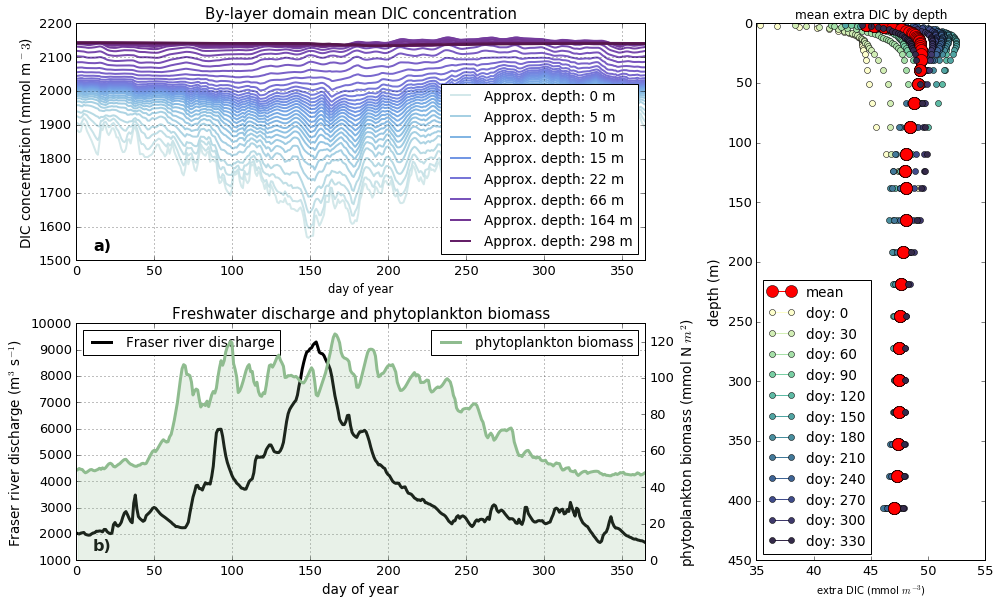

In [11]:
ts = 15 # title font
fs = 13.5 # all other font sizes
fact = 1
lw = 2
fig = plt.figure(figsize=(14*fact, 8.5*fact))
seg = 45
shift = 2
depth = mesh['e3t_0'][0,:,250,250]
ax1 = plt.subplot2grid((2,3), (0,0), colspan=2, rowspan=1)
tcm = cm.dense
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    if i%5 == 0:
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(loc = 'best', fontsize = fs)
plt.xlim([0,365*1])
plt.grid()
ax1.set_xlabel('day of year', fontsize = fs-2)
ax1.set_ylabel('DIC concentration (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean DIC concentration', fontsize = ts)


ax2 = plt.subplot2grid((2,3), (1,0), colspan=2, rowspan=1)
ax2b =ax2.twinx()
ax2.plot(days_in,Fraser_discharge,'-k', linewidth = 3, label = 'Fraser river discharge')
ax2.grid()
#ax2b.plot(days_in,flag_mas_mm_m2,color = 'greenyellow',label ='flagellates')
#ax2b.plot(days_in,diat_mas_mm_m2,color = 'mediumspringgreen',label ='diatoms')
#ax2b.plot(days_in,cili_mas_mm_m2,color = 'forestgreen',label ='ciliates')
ax2b.plot(days_in, flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2,\
          color = 'darkseagreen', label = 'phytoplankton biomass', linewidth = 3)
ax2b.fill_between(days_in, np.zeros_like(flag_mas_mm_m2), (flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2), \
                 color = 'darkseagreen', alpha = 0.2 )

ax2b.legend(loc = 'best', fontsize = fs)
ax2.legend(loc = 'upper left', fontsize = fs)
ax2b.set_ylabel('phytoplankton biomass (mmol N $m^2$)', fontsize = fs)
ax2.set_xlabel('day of year', fontsize = fs)
ax2.set_ylabel('Fraser river discharge (m$^3$ s$^{-1}$)', fontsize = fs)
ax2.set_title('Freshwater discharge and phytoplankton biomass', fontsize = ts)
plt.xlim([0,365])
ax2b.set_ylim([0,130])
ax2.text(0.03, 0.03, 'b)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='bottom')


ax3 = plt.subplot2grid((2,3), (0,2), colspan=1, rowspan=2)
ax3.text(0.03, 0.03, 'c)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')
tcm = cm.deep
mesh = nc.Dataset('//data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')



for d in range(0,12):
    for i in range(0,40):
        zdepth = np.sum(depth[0:i+1]) 
        if ((i == 0) & (d ==0)):        
            ax3.plot((np.nanmean(BR3_var,axis =1)[i]-\
                      np.nanmean(PI4_var,axis=1)[i]),zdepth,\
                     marker = 'o', color = 'r', markersize = 12, label = 'mean')
        else:
            ax3.plot((np.nanmean(BR3_var,axis =1)[i]-\
                      np.nanmean(PI4_var,axis=1)[i]),zdepth,\
                     marker = 'o', color = 'r', markersize = 12)
        if i == 0:
            ax3.plot((BR3_var[i,d*30]-PI4_var[i,d*30]),zdepth,\
                    color = tcm(1.*d/12), marker = 'o', linestyle = None, label = 'doy: '+ str(d*30))
        else:
            ax3.plot((BR3_var[i,d*30]-PI4_var[i,d*30]),zdepth,\
                    color = tcm(1.*d/12), marker = 'o')

ax3.set_title('mean extra DIC by depth')
ax3.invert_yaxis()
ax3.legend(loc = 'best', fontsize = fs)
ax3.set_xlabel('extra DIC (mmol $m^{-3}$)')
ax3.set_ylabel('depth (m)', fontsize = fs)
fig.tight_layout()





### [C] nice plot PI4 with extra DIC at the 12 stations

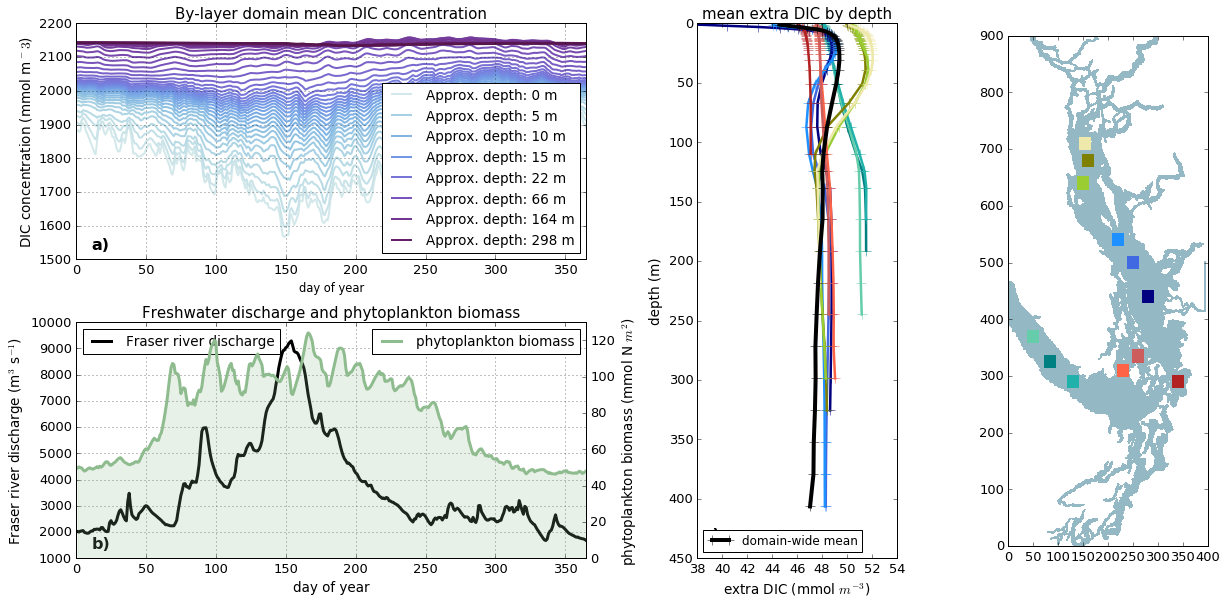

In [12]:
ts = 15 # title font
fs = 13.5 # all other font sizes
fact = 1
fig = plt.figure(figsize=(17*fact, 8.5*fact))
seg = 45
shift = 2
depth = mesh['e3t_0'][0,:,250,250]
ax1 = plt.subplot2grid((2,4), (0,0), colspan=2, rowspan=1)
tcm = cm.dense
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    if i%5 == 0:
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(loc = 'best', fontsize = fs)
plt.xlim([0,365*1])
plt.grid()
ax1.set_xlabel('day of year', fontsize = fs-2)
ax1.set_ylabel('DIC concentration (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean DIC concentration', fontsize = ts)


ax2 = plt.subplot2grid((2,4), (1,0), colspan=2, rowspan=1)
ax2b =ax2.twinx()
ax2.plot(days_in,Fraser_discharge,'-k', linewidth = 3, label = 'Fraser river discharge')
ax2.grid()
ax2b.plot(days_in, flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2,\
          color = 'darkseagreen', label = 'phytoplankton biomass', linewidth = 3)
ax2b.fill_between(days_in, np.zeros_like(flag_mas_mm_m2), (flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2), \
                 color = 'darkseagreen', alpha = 0.2 )

ax2b.legend(loc = 'best', fontsize = fs)
ax2.legend(loc = 'upper left', fontsize = fs)
ax2b.set_ylabel('phytoplankton biomass (mmol N $m^2$)', fontsize = fs)
ax2.set_xlabel('day of year', fontsize = fs)
ax2.set_ylabel('Fraser river discharge (m$^3$ s$^{-1}$)', fontsize = fs)
ax2.set_title('Freshwater discharge and phytoplankton biomass', fontsize = ts)
plt.xlim([0,365])
ax2b.set_ylim([0,130])
ax2.text(0.03, 0.03, 'b)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='bottom')


ax3 = plt.subplot2grid((2,4), (0,2), colspan=1, rowspan=2)
ax3.text(0.03, 0.03, 'c)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')
tcm = cm.deep
mesh = nc.Dataset('//data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')


BR3_dp = np.nanmean(BR3_var, axis =1)
PI4_dp = np.nanmean(PI4_var, axis =1)

BR3_jdf_dp = np.nanmean(BR3_var_jdf, axis =1)
PI4_jdf_dp = np.nanmean(PI4_var_jdf, axis =1)
BR3_cs_dp = np.nanmean(BR3_var_cs, axis =1)
PI4_cs_dp = np.nanmean(PI4_var_cs, axis =1)
BR3_ns_dp = np.nanmean(BR3_var_ns, axis =1)
PI4_ns_dp = np.nanmean(PI4_var_ns, axis =1)
BR3_haro_dp = np.nanmean(BR3_var_haro, axis =1)
PI4_haro_dp = np.nanmean(PI4_var_haro, axis =1)

BR3_jdf2_dp = np.nanmean(BR3_var_jdf2, axis =1)
PI4_jdf2_dp = np.nanmean(PI4_var_jdf2, axis =1)
BR3_cs2_dp = np.nanmean(BR3_var_cs2, axis =1)
PI4_cs2_dp = np.nanmean(PI4_var_cs2, axis =1)
BR3_ns2_dp = np.nanmean(BR3_var_ns2, axis =1)
PI4_ns2_dp = np.nanmean(PI4_var_ns2, axis =1)
BR3_haro2_dp = np.nanmean(BR3_var_haro2, axis =1)
PI4_haro2_dp = np.nanmean(PI4_var_haro2, axis =1)

BR3_jdf3_dp = np.nanmean(BR3_var_jdf3, axis =1)
PI4_jdf3_dp = np.nanmean(PI4_var_jdf3, axis =1)
BR3_cs3_dp = np.nanmean(BR3_var_cs3, axis =1)
PI4_cs3_dp = np.nanmean(PI4_var_cs3, axis =1)
BR3_ns3_dp = np.nanmean(BR3_var_ns3, axis =1)
PI4_ns3_dp = np.nanmean(PI4_var_ns3, axis =1)
BR3_haro3_dp = np.nanmean(BR3_var_haro3, axis =1)
PI4_haro3_dp = np.nanmean(PI4_var_haro3, axis =1)

zdepth = np.zeros(40)
for i in range(0,40):
    zdepth[i] = np.sum(depth[0:i+1]) 
    

ax3.plot(BR3_jdf_dp-PI4_jdf_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BR3_jdf2_dp-PI4_jdf2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf2_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BR3_jdf3_dp-PI4_jdf3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf3_col, markersize = 10)# label = 'JdF mean')

ax3.plot(BR3_cs_dp-PI4_cs_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs_col, markersize = 10)# label = 'cs mean')
ax3.plot(BR3_cs2_dp-PI4_cs2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs2_col, markersize = 10)# label = 'cs mean')
ax3.plot(BR3_cs3_dp-PI4_cs3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs3_col, markersize = 10)# label = 'cs mean')

ax3.plot(BR3_ns_dp-PI4_ns_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns_col, markersize = 10)# label = 'ns mean')
ax3.plot(BR3_ns2_dp-PI4_ns2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns2_col, markersize = 10)# label = 'ns mean')
ax3.plot(BR3_ns3_dp-PI4_ns3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns3_col, markersize = 10)# label = 'ns mean')

ax3.plot(BR3_haro_dp-PI4_haro_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro_col, markersize = 10)# label = 'haro mean')
ax3.plot(BR3_haro2_dp-PI4_haro2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro2_col, markersize = 10)# label = 'haro mean')
ax3.plot(BR3_haro3_dp-PI4_haro3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro3_col, markersize = 10)# label = 'haro mean')

ax3.plot(BR3_dp-PI4_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = 'k', markersize = 10, label = 'domain-wide mean')


ax3.set_title('mean extra DIC by depth', fontsize = ts)
ax3.invert_yaxis()
ax3.legend(loc = 'best')
ax3.set_xlabel('extra DIC (mmol $m^{-3}$)', fontsize = fs)
ax3.set_ylabel('depth (m)', fontsize = fs)

ax4 = plt.subplot2grid((2,4), (0,3), colspan=1, rowspan=2)
im = ax4.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax4)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
ax4.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
ax4.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
ax4.add_patch(rect_jdf)

rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
ax4.add_patch(rect_haro)
rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
ax4.add_patch(rect_haro)
rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
ax4.add_patch(rect_haro)

rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
ax4.add_patch(rect_cs)
rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
ax4.add_patch(rect_cs)
rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
ax4.add_patch(rect_cs)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
ax4.add_patch(rect_ns)
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
ax4.add_patch(rect_ns)
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
ax4.add_patch(rect_ns)


fig.tight_layout()





### [D] the same plot as above, with DIC normalized to salinity by multiplying by S_meas/S_ref where S ref = 30...

No handles with labels found to put in legend.


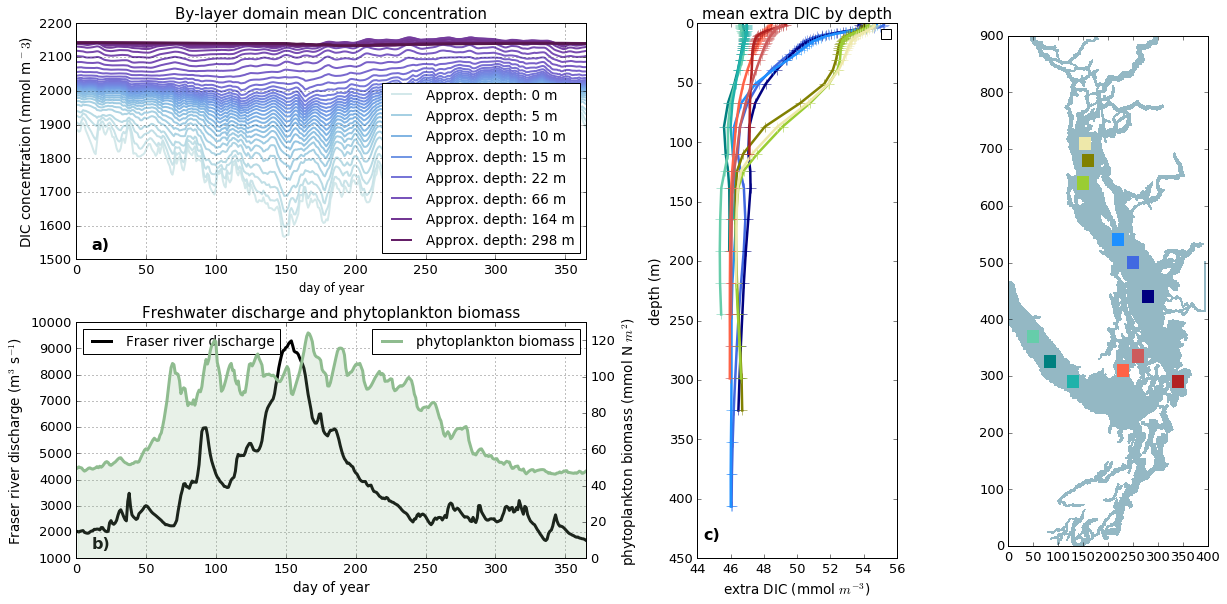

In [13]:
ts = 15 # title font
fs = 13.5 # all other font sizes
fact = 1
fig = plt.figure(figsize=(17*fact, 8.5*fact))
seg = 45
shift = 2
depth = mesh['e3t_0'][0,:,250,250]
ax1 = plt.subplot2grid((2,4), (0,0), colspan=2, rowspan=1)
tcm = cm.dense
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    if i%5 == 0:
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(loc = 'best', fontsize = fs)
plt.xlim([0,365*1])
plt.grid()
ax1.set_xlabel('day of year', fontsize = fs-2)
ax1.set_ylabel('DIC concentration (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean DIC concentration', fontsize = ts)


ax2 = plt.subplot2grid((2,4), (1,0), colspan=2, rowspan=1)
ax2b =ax2.twinx()
ax2.plot(days_in,Fraser_discharge,'-k', linewidth = 3, label = 'Fraser river discharge')
ax2.grid()
ax2b.plot(days_in, flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2,\
          color = 'darkseagreen', label = 'phytoplankton biomass', linewidth = 3)
ax2b.fill_between(days_in, np.zeros_like(flag_mas_mm_m2), (flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2), \
                 color = 'darkseagreen', alpha = 0.2 )

ax2b.legend(loc = 'best', fontsize = fs)
ax2.legend(loc = 'upper left', fontsize = fs)
ax2b.set_ylabel('phytoplankton biomass (mmol N $m^2$)', fontsize = fs)
ax2.set_xlabel('day of year', fontsize = fs)
ax2.set_ylabel('Fraser river discharge (m$^3$ s$^{-1}$)', fontsize = fs)
ax2.set_title('Freshwater discharge and phytoplankton biomass', fontsize = ts)
plt.xlim([0,365])
ax2b.set_ylim([0,130])
ax2.text(0.03, 0.03, 'b)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='bottom')


ax3 = plt.subplot2grid((2,4), (0,2), colspan=1, rowspan=2)
ax3.text(0.03, 0.03, 'c)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')
tcm = cm.deep
mesh = nc.Dataset('//data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')


BR3_dp = np.nanmean(BR3_var, axis =1)
PI4_dp = np.nanmean(PI4_var, axis =1)

standard_s = np.zeros(40)
standard_s[:] = 30

BR3_jdf_dp = np.nanmean(BR3_var_jdf, axis =1)*(standard_s/np.nanmean(BR3_sal_jdf, axis = 1))
PI4_jdf_dp = np.nanmean(PI4_var_jdf, axis =1)*(standard_s/np.nanmean(PI4_sal_jdf, axis = 1))
BR3_cs_dp = np.nanmean(BR3_var_cs, axis =1)*(standard_s/np.nanmean(BR3_sal_cs, axis = 1))
PI4_cs_dp = np.nanmean(PI4_var_cs, axis =1)*(standard_s/np.nanmean(PI4_sal_cs, axis = 1))
BR3_ns_dp = np.nanmean(BR3_var_ns, axis =1)*(standard_s/np.nanmean(BR3_sal_ns, axis = 1))
PI4_ns_dp = np.nanmean(PI4_var_ns, axis =1)*(standard_s/np.nanmean(PI4_sal_ns, axis = 1))
BR3_haro_dp = np.nanmean(BR3_var_haro, axis =1)*(standard_s/np.nanmean(BR3_sal_haro, axis = 1))
PI4_haro_dp = np.nanmean(PI4_var_haro, axis =1)*(standard_s/np.nanmean(PI4_sal_haro, axis = 1))

BR3_jdf2_dp = np.nanmean(BR3_var_jdf2, axis =1)*(standard_s/np.nanmean(BR3_sal_jdf2, axis = 1))
PI4_jdf2_dp = np.nanmean(PI4_var_jdf2, axis =1)*(standard_s/np.nanmean(PI4_sal_jdf2, axis = 1))
BR3_cs2_dp = np.nanmean(BR3_var_cs2, axis =1)*(standard_s/np.nanmean(BR3_sal_cs2, axis = 1))
PI4_cs2_dp = np.nanmean(PI4_var_cs2, axis =1)*(standard_s/np.nanmean(PI4_sal_cs2, axis = 1))
BR3_ns2_dp = np.nanmean(BR3_var_ns2, axis =1)*(standard_s/np.nanmean(BR3_sal_ns2, axis = 1))
PI4_ns2_dp = np.nanmean(PI4_var_ns2, axis =1)*(standard_s/np.nanmean(PI4_sal_ns2, axis = 1))
BR3_haro2_dp = np.nanmean(BR3_var_haro2, axis =1)*(standard_s/np.nanmean(BR3_sal_haro2, axis = 1))
PI4_haro2_dp = np.nanmean(PI4_var_haro2, axis =1)*(standard_s/np.nanmean(PI4_sal_haro2, axis = 1))

BR3_jdf3_dp = np.nanmean(BR3_var_jdf3, axis =1)*(standard_s/np.nanmean(BR3_sal_jdf3, axis = 1))
PI4_jdf3_dp = np.nanmean(PI4_var_jdf3, axis =1)*(standard_s/np.nanmean(PI4_sal_jdf3, axis = 1))
BR3_cs3_dp = np.nanmean(BR3_var_cs3, axis =1)*(standard_s/np.nanmean(BR3_sal_cs3, axis = 1))
PI4_cs3_dp = np.nanmean(PI4_var_cs3, axis =1)*(standard_s/np.nanmean(PI4_sal_cs3, axis = 1))
BR3_ns3_dp = np.nanmean(BR3_var_ns3, axis =1)*(standard_s/np.nanmean(BR3_sal_ns3, axis = 1))
PI4_ns3_dp = np.nanmean(PI4_var_ns3, axis =1)*(standard_s/np.nanmean(PI4_sal_ns3, axis = 1))
BR3_haro3_dp = np.nanmean(BR3_var_haro3, axis =1)*(standard_s/np.nanmean(BR3_sal_haro3, axis = 1))
PI4_haro3_dp = np.nanmean(PI4_var_haro3, axis =1)*(standard_s/np.nanmean(PI4_sal_haro3, axis = 1))

zdepth = np.zeros(40)
for i in range(0,40):
    zdepth[i] = np.sum(depth[0:i+1]) 
    

ax3.plot(BR3_jdf_dp-PI4_jdf_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BR3_jdf2_dp-PI4_jdf2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf2_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BR3_jdf3_dp-PI4_jdf3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf3_col, markersize = 10)# label = 'JdF mean')

ax3.plot(BR3_cs_dp-PI4_cs_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs_col, markersize = 10)# label = 'cs mean')
ax3.plot(BR3_cs2_dp-PI4_cs2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs2_col, markersize = 10)# label = 'cs mean')
ax3.plot(BR3_cs3_dp-PI4_cs3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs3_col, markersize = 10)# label = 'cs mean')

ax3.plot(BR3_ns_dp-PI4_ns_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns_col, markersize = 10)# label = 'ns mean')
ax3.plot(BR3_ns2_dp-PI4_ns2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns2_col, markersize = 10)# label = 'ns mean')
ax3.plot(BR3_ns3_dp-PI4_ns3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns3_col, markersize = 10)# label = 'ns mean')

ax3.plot(BR3_haro_dp-PI4_haro_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro_col, markersize = 10)# label = 'haro mean')
ax3.plot(BR3_haro2_dp-PI4_haro2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro2_col, markersize = 10)# label = 'haro mean')
ax3.plot(BR3_haro3_dp-PI4_haro3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro3_col, markersize = 10)# label = 'haro mean')

# ax3.plot(BR3_dp-PI4_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 4, color = 'k', markersize = 10, label = 'domain-wide mean')


ax3.set_title('mean extra DIC by depth', fontsize = ts)
ax3.invert_yaxis()
ax3.legend(loc = 'best')
ax3.set_xlabel('extra DIC (mmol $m^{-3}$)', fontsize = fs)
ax3.set_ylabel('depth (m)', fontsize = fs)

ax4 = plt.subplot2grid((2,4), (0,3), colspan=1, rowspan=2)
im = ax4.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax4)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
ax4.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
ax4.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
ax4.add_patch(rect_jdf)

rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
ax4.add_patch(rect_haro)
rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
ax4.add_patch(rect_haro)
rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
ax4.add_patch(rect_haro)

rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
ax4.add_patch(rect_cs)
rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
ax4.add_patch(rect_cs)
rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
ax4.add_patch(rect_cs)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
ax4.add_patch(rect_ns)
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
ax4.add_patch(rect_ns)
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
ax4.add_patch(rect_ns)


fig.tight_layout()





### [E] "PUTTING INTO PROPERTY-PROPERTY SPACE, and a salinity profile"

#### filled-in circles are BR, white ones are PI


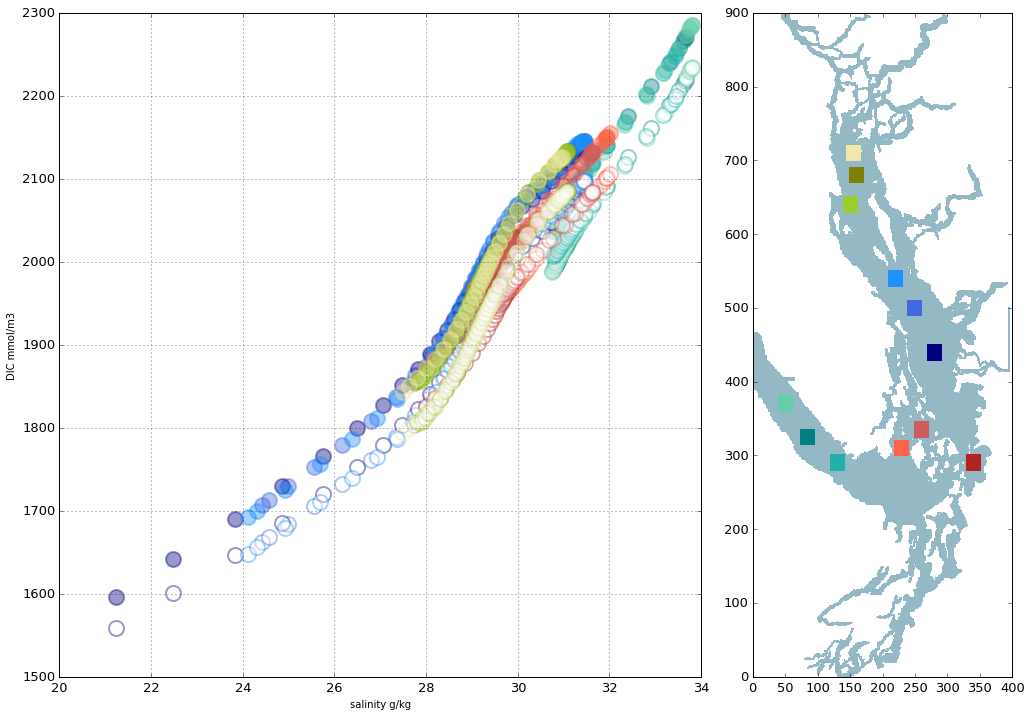

In [25]:
#markersize 
ms = 15
fact = 1.4
alph = 0.4
fig = plt.figure(figsize=(12.5*fact, 8.5*fact))
ax3 = plt.subplot2grid((4,6), (0,0), colspan=4, rowspan=4)
ax3.grid()

BR3_jdf_dp = np.nanmean(BR3_var_jdf, axis =1)
BR3_jdf_dp_sal = np.nanmean(BR3_sal_jdf, axis =1)
plt.plot(BR3_jdf_dp_sal, BR3_jdf_dp, marker = 'o', \
         markerfacecolor = jdf_col, markeredgecolor = jdf_col, linestyle = '', markersize = ms, markeredgewidth = 2, alpha = alph)
PI4_jdf_dp = np.nanmean(PI4_var_jdf, axis =1)
PI4_jdf_dp_sal = np.nanmean(PI4_sal_jdf, axis =1)
plt.plot(PI4_jdf_dp_sal, PI4_jdf_dp, marker = 'o', \
         markerfacecolor = 'w', markeredgecolor = jdf_col, linestyle = '', markersize = ms, markeredgewidth = 2, alpha = alph)
BR3_jdf2_dp = np.nanmean(BR3_var_jdf2, axis =1)
BR3_jdf2_dp_sal = np.nanmean(BR3_sal_jdf2, axis =1)
plt.plot(BR3_jdf2_dp_sal, BR3_jdf2_dp, marker = 'o', \
         markerfacecolor = jdf2_col, markeredgecolor = jdf2_col, linestyle = '', markersize = ms, markeredgewidth = 2, alpha = alph)
PI4_jdf2_dp = np.nanmean(PI4_var_jdf2, axis =1)
PI4_jdf2_dp_sal = np.nanmean(PI4_sal_jdf2, axis =1)
plt.plot(PI4_jdf2_dp_sal, PI4_jdf2_dp, marker = 'o', \
         markerfacecolor = 'w', markeredgecolor = jdf2_col, linestyle = '', markersize = ms, markeredgewidth = 2, alpha = alph)
BR3_jdf3_dp = np.nanmean(BR3_var_jdf3, axis =1)
BR3_jdf3_dp_sal = np.nanmean(BR3_sal_jdf3, axis =1)
plt.plot(BR3_jdf3_dp_sal, BR3_jdf3_dp, marker = 'o', \
         markerfacecolor = jdf3_col, markeredgecolor = jdf3_col, linestyle = '', markersize = ms, markeredgewidth = 2, alpha = alph)
PI4_jdf3_dp = np.nanmean(PI4_var_jdf3, axis =1)
PI4_jdf3_dp_sal = np.nanmean(PI4_sal_jdf3, axis =1)
plt.plot(PI4_jdf3_dp_sal, PI4_jdf3_dp, marker = 'o', \
         markerfacecolor = 'w', markeredgecolor = jdf3_col, linestyle = '', markersize = ms, markeredgewidth = 2, alpha = alph)

BR3_cs_dp = np.nanmean(BR3_var_cs, axis =1)
BR3_cs_dp_sal = np.nanmean(BR3_sal_cs, axis =1)
plt.plot(BR3_cs_dp_sal, BR3_cs_dp, marker = 'o', \
         markerfacecolor = cs_col, markeredgecolor = cs_col, linestyle = '', markersize = ms, markeredgewidth = 2, alpha = alph)
PI4_cs_dp = np.nanmean(PI4_var_cs, axis =1)
PI4_cs_dp_sal = np.nanmean(PI4_sal_cs, axis =1)
plt.plot(PI4_cs_dp_sal, PI4_cs_dp, marker = 'o', \
         markerfacecolor = 'w', markeredgecolor = cs_col, linestyle = '', markersize = ms, markeredgewidth = 2, alpha = alph)
BR3_cs2_dp = np.nanmean(BR3_var_cs2, axis =1)
BR3_cs2_dp_sal = np.nanmean(BR3_sal_cs2, axis =1)
plt.plot(BR3_cs2_dp_sal, BR3_cs2_dp, marker = 'o', \
         markerfacecolor = cs2_col, markeredgecolor = cs2_col, linestyle = '', markersize = ms, markeredgewidth = 2, alpha = alph)
PI4_cs2_dp = np.nanmean(PI4_var_cs2, axis =1)
PI4_cs2_dp_sal = np.nanmean(PI4_sal_cs2, axis =1)
plt.plot(PI4_cs2_dp_sal, PI4_cs2_dp, marker = 'o', \
         markerfacecolor = 'w', markeredgecolor = cs2_col, linestyle = '', markersize = ms, markeredgewidth = 2, alpha = alph)
BR3_cs3_dp = np.nanmean(BR3_var_cs3, axis =1)
BR3_cs3_dp_sal = np.nanmean(BR3_sal_cs3, axis =1)
plt.plot(BR3_cs3_dp_sal, BR3_cs3_dp, marker = 'o', \
         markerfacecolor = cs3_col, markeredgecolor = cs3_col, linestyle = '', markersize = ms, markeredgewidth = 2, alpha = alph)
PI4_cs3_dp = np.nanmean(PI4_var_cs3, axis =1)
PI4_cs3_dp_sal = np.nanmean(PI4_sal_cs3, axis =1)
plt.plot(PI4_cs3_dp_sal, PI4_cs3_dp, marker = 'o', \
         markerfacecolor = 'w', markeredgecolor = cs3_col, linestyle = '', markersize = ms, markeredgewidth = 2, alpha = alph)
#plt.scatter(PI4_jdf_dp, PI4_jdf_dp_sal, marker = 'o', facecolors='w',  edgecolors = jdf_col, edgewidth = 2)

BR3_haro_dp = np.nanmean(BR3_var_haro, axis =1)
BR3_haro_dp_sal = np.nanmean(BR3_sal_haro, axis =1)
plt.plot(BR3_haro_dp_sal, BR3_haro_dp, marker = 'o', \
         markerfacecolor = haro_col, markeredgecolor = haro_col, linestyle = '', markersize = ms, markeredgewidth = 2, alpha = alph)
PI4_haro_dp = np.nanmean(PI4_var_haro, axis =1)
PI4_haro_dp_sal = np.nanmean(PI4_sal_haro, axis =1)
plt.plot(PI4_haro_dp_sal, PI4_haro_dp, marker = 'o', \
         markerfacecolor = 'w', markeredgecolor = haro_col, linestyle = '', markersize = ms, markeredgewidth = 2, alpha = alph)
BR3_haro2_dp = np.nanmean(BR3_var_haro2, axis =1)
BR3_haro2_dp_sal = np.nanmean(BR3_sal_haro2, axis =1)
plt.plot(BR3_haro2_dp_sal, BR3_haro2_dp, marker = 'o', \
         markerfacecolor = haro2_col, markeredgecolor = haro2_col, linestyle = '', markersize = ms, markeredgewidth = 2, alpha = alph)
PI4_haro2_dp = np.nanmean(PI4_var_haro2, axis =1)
PI4_haro2_dp_sal = np.nanmean(PI4_sal_haro2, axis =1)
plt.plot(PI4_haro2_dp_sal, PI4_haro2_dp, marker = 'o', \
         markerfacecolor = 'w', markeredgecolor = haro2_col, linestyle = '', markersize = ms, markeredgewidth = 2, alpha = alph)
BR3_haro3_dp = np.nanmean(BR3_var_haro3, axis =1)
BR3_haro3_dp_sal = np.nanmean(BR3_sal_haro3, axis =1)
plt.plot(BR3_haro3_dp_sal, BR3_haro3_dp, marker = 'o', \
         markerfacecolor = haro3_col, markeredgecolor = haro3_col, linestyle = '', markersize = ms, markeredgewidth = 2, alpha = alph)
PI4_haro3_dp = np.nanmean(PI4_var_haro3, axis =1)
PI4_haro3_dp_sal = np.nanmean(PI4_sal_haro3, axis =1)
plt.plot(PI4_haro3_dp_sal, PI4_haro3_dp, marker = 'o', \
         markerfacecolor = 'w', markeredgecolor = haro3_col, linestyle = '', markersize = ms, markeredgewidth = 2, alpha = alph)

BR3_ns_dp = np.nanmean(BR3_var_ns, axis =1)
BR3_ns_dp_sal = np.nanmean(BR3_sal_ns, axis =1)
plt.plot(BR3_ns_dp_sal, BR3_ns_dp, marker = 'o', \
         markerfacecolor = ns_col, markeredgecolor = ns_col, linestyle = '',\
         markersize = ms, markeredgewidth = 2, alpha = alph)
PI4_ns_dp = np.nanmean(PI4_var_ns, axis =1)
PI4_ns_dp_sal = np.nanmean(PI4_sal_ns, axis =1)
plt.plot(PI4_ns_dp_sal, PI4_ns_dp, marker = 'o', \
         markerfacecolor = 'w', markeredgecolor = ns_col, linestyle = '', markersize = ms, markeredgewidth = 2, alpha = alph)
BR3_ns2_dp = np.nanmean(BR3_var_ns2, axis =1)
BR3_ns2_dp_sal = np.nanmean(BR3_sal_ns2, axis =1)
plt.plot(BR3_ns2_dp_sal, BR3_ns2_dp, marker = 'o', \
         markerfacecolor = ns2_col, markeredgecolor = ns2_col, linestyle = '', markersize = ms, markeredgewidth = 2, alpha = alph)
PI4_ns2_dp = np.nanmean(PI4_var_ns2, axis =1)
PI4_ns2_dp_sal = np.nanmean(PI4_sal_ns2, axis =1)
plt.plot(PI4_ns2_dp_sal, PI4_ns2_dp, marker = 'o', \
         markerfacecolor = 'w', markeredgecolor = ns2_col, linestyle = '', markersize = ms, markeredgewidth = 2, alpha = alph)
BR3_ns3_dp = np.nanmean(BR3_var_ns3, axis =1)
BR3_ns3_dp_sal = np.nanmean(BR3_sal_ns3, axis =1)
plt.plot(BR3_ns3_dp_sal, BR3_ns3_dp, marker = 'o', \
         markerfacecolor = ns3_col, markeredgecolor = ns3_col, linestyle = '', markersize = ms, markeredgewidth = 2, alpha = alph)
PI4_ns3_dp = np.nanmean(PI4_var_ns3, axis =1)
PI4_ns3_dp_sal = np.nanmean(PI4_sal_ns3, axis =1)
plt.plot(PI4_ns3_dp_sal, PI4_ns3_dp, marker = 'o', \
         markerfacecolor = 'w', markeredgecolor = ns3_col, linestyle = '', markersize = ms, markeredgewidth = 2, alpha = alph)

plt.xlabel('salinity g/kg')
plt.ylabel('DIC mmol/m3')

ax4 = plt.subplot2grid((4,6), (0,4), colspan=2, rowspan=4)
im = ax4.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax4)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
ax4.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
ax4.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
ax4.add_patch(rect_jdf)

rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
ax4.add_patch(rect_haro)
rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
ax4.add_patch(rect_haro)
rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
ax4.add_patch(rect_haro)

rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
ax4.add_patch(rect_cs)
rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
ax4.add_patch(rect_cs)
rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
ax4.add_patch(rect_cs)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
ax4.add_patch(rect_ns)
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
ax4.add_patch(rect_ns)
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
ax4.add_patch(rect_ns)

#### 

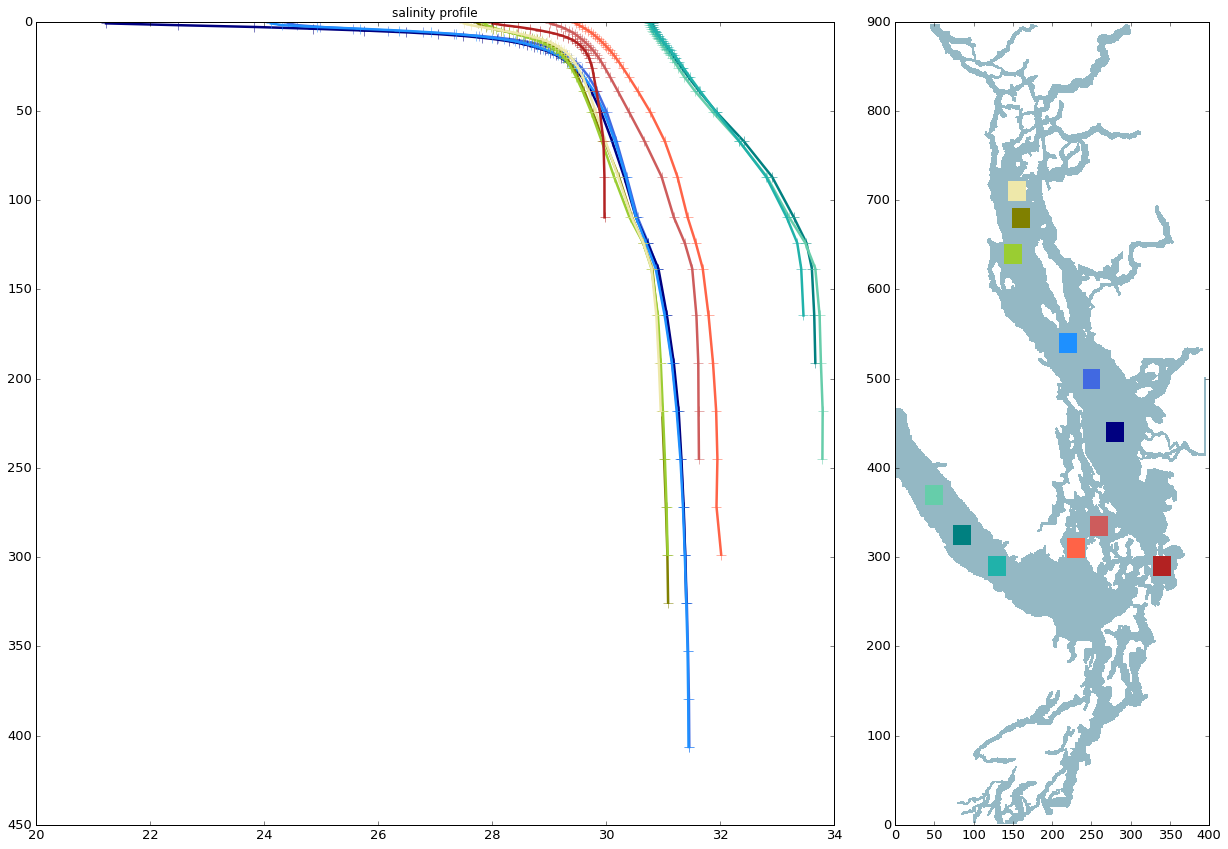

In [26]:
fig = plt.figure(figsize=(12.5*fact, 8.5*fact))
ax3 = plt.subplot2grid((4,6), (0,0), colspan=4, rowspan=4)

zdepth = np.zeros(40)
for i in range(0,40):
    zdepth[i] = np.sum(depth[0:i+1]) 
    
ax3.plot(PI4_jdf_dp_sal,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf_col, markersize = 10)# label = 'JdF mean')
ax3.plot(PI4_jdf2_dp_sal,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf2_col, markersize = 10)# label = 'JdF mean')
ax3.plot(PI4_jdf3_dp_sal,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf3_col, markersize = 10)# label = 'JdF mean')

ax3.plot(PI4_cs_dp_sal,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs_col, markersize = 10)# label = 'cs mean')
ax3.plot(PI4_cs2_dp_sal,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs2_col, markersize = 10)# label = 'cs mean')
ax3.plot(PI4_cs3_dp_sal,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs3_col, markersize = 10)# label = 'cs mean')

ax3.plot(PI4_ns_dp_sal,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns_col, markersize = 10)# label = 'ns mean')
ax3.plot(PI4_ns2_dp_sal,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns2_col, markersize = 10)# label = 'ns mean')
ax3.plot(PI4_ns3_dp_sal,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns3_col, markersize = 10)# label = 'ns mean')

ax3.plot(PI4_haro_dp_sal,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro_col, markersize = 10)# label = 'haro mean')
ax3.plot(PI4_haro2_dp_sal,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro2_col, markersize = 10)# label = 'haro mean')
ax3.plot(PI4_haro3_dp_sal,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro3_col, markersize = 10)# label = 'haro mean')
ax3.invert_yaxis()
plt.title('salinity profile')
ax4 = plt.subplot2grid((4,6), (0,4), colspan=2, rowspan=4)
im = ax4.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax4)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
ax4.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
ax4.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
ax4.add_patch(rect_jdf)

rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
ax4.add_patch(rect_haro)
rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
ax4.add_patch(rect_haro)
rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
ax4.add_patch(rect_haro)

rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
ax4.add_patch(rect_cs)
rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
ax4.add_patch(rect_cs)
rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
ax4.add_patch(rect_cs)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
ax4.add_patch(rect_ns)
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
ax4.add_patch(rect_ns)
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
ax4.add_patch(rect_ns)

plt.tight_layout()

In [27]:
BR_var = np.zeros([40,365*3])
BR_var[:,0:365] = BR3_var- BR1_var
BR_var[:,365:2*365] = BR3_var - BR2_var

#
PI_var = np.zeros([40,365*3])
PI_var[:,0:365] = PI4_var- PI1_var
PI_var[:,365:2*365] = PI4_var - PI2_var
PI_var[:,365*2:3*365] = PI4_var - PI3rr_var

### [F] SPINUP METRICS - SUBTRACTING PREVIOUS RUNS (BR1,BR2 AND PI1-PI3rr) FROM MOST UP - TO - DATE RUN (BR3, PI4) - A PERFECTLY SPUN UP RUN WOULD HAVE NO DIFFERENCE. 

Text(0, 0.5, 'DIC difference')

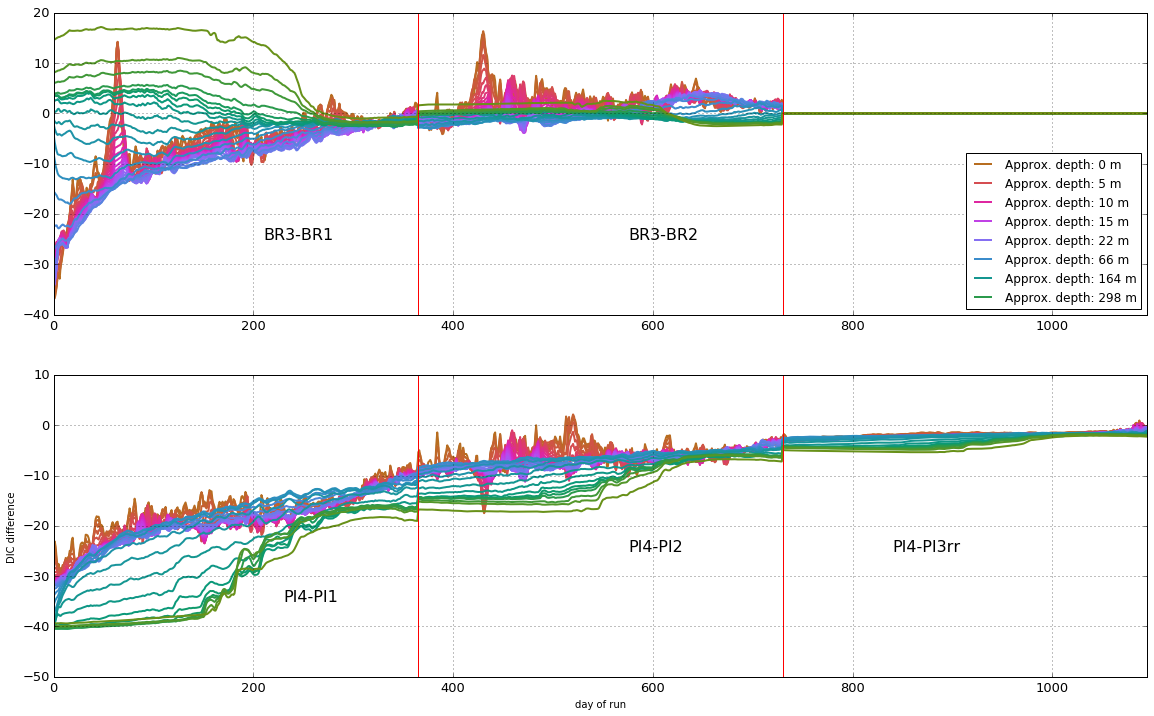

In [28]:

seg = 45
shift = 2
tcm = cm.phase
depth = mesh['e3t_0'][0,:,250,250]
days_in3 = np.arange(0,365*3,1)

fig = plt.figure(figsize=(14*fact, 8.5*fact))
ax1 = plt.subplot2grid((2,3), (0,0), colspan=3, rowspan=1)

for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax1.plot(days_in3,BR_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    if i%5 == 0:
        ax1.plot(days_in3,BR_var[i,:],color = tcm(1.*(i+shift)/seg),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax1.grid()
ax1.text(210,-25,'BR3-BR1', fontsize = 16)
ax1.text(210+365,-25,'BR3-BR2', fontsize = 16)
plt.axvline(x=365, color = 'r')
plt.axvline(x=365*2, color = 'r')

ax1.legend(loc = 'lower right')
ax1.set_xlim([0,1095])

ax2 = plt.subplot2grid((2,3), (1,0), colspan=3, rowspan=1)

for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax2.plot(days_in3,PI_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    if i%5 == 0:
        ax2.plot(days_in3,PI_var[i,:],color = tcm(1.*(i+shift)/seg),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)

ax2.text(230,-35,'PI4-PI1', fontsize = 16)
ax2.text(210+365,-25,'PI4-PI2', fontsize = 16)
ax2.text(110+365*2,-25,'PI4-PI3rr', fontsize = 16)
ax2.grid()
ax2.set_xlabel('day of run')
plt.axvline(x=365, color = 'r')
plt.axvline(x=365*2, color = 'r')
ax2.set_xlim([0,1095])

ax2.set_xlabel('day of run')
ax2.set_ylabel('DIC difference')


### [G] By-layer differences - better visible in second plot below (G2)

Text(0.5, 1.0, 'By-layer domain mean DIC concentration - BR3 run - PI4 run ')

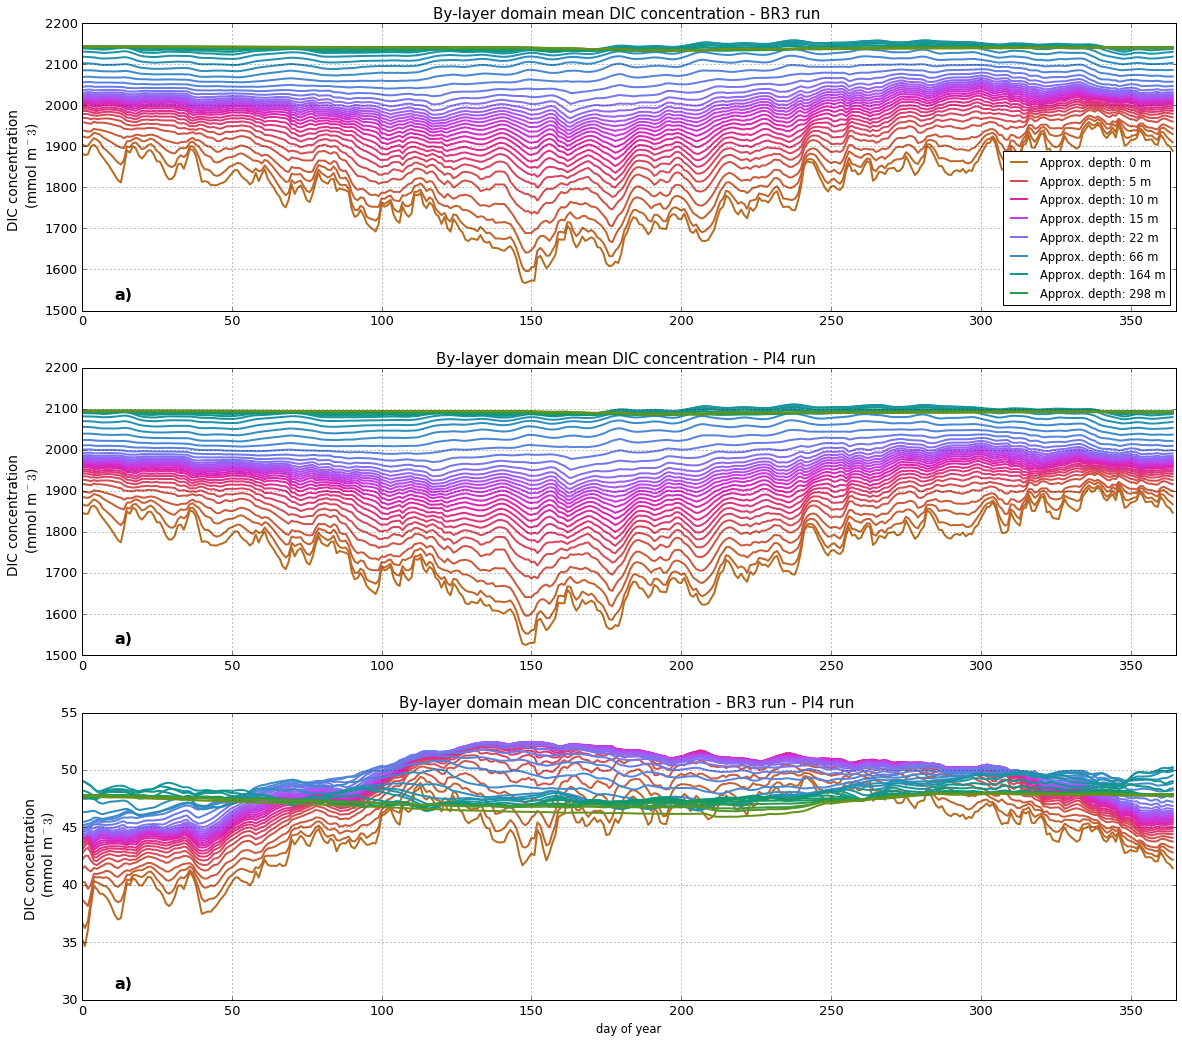

In [29]:

seg = 45
shift = 2
tcm = cm.deep
depth = mesh['e3t_0'][0,:,250,250]


fig = plt.figure(figsize=(14*fact, 12.5*fact))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)

tcm = cm.phase
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    if i%5 == 0:
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(loc = 'best', fontsize = fs-2)
plt.xlim([0,365*1])
plt.grid()
#ax1.set_xlabel('day of year', fontsize = fs-2)
ax1.set_ylabel('DIC concentration \n (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean DIC concentration - BR3 run ', fontsize = ts)


ax2 = plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=1)
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax2.plot(days_in,PI4_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    if i%5 == 0:
        ax2.plot(days_in,PI4_var[i,:],color = tcm(1.*(i+shift)/seg),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax2.text(0.03, 0.03, 'a)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='bottom')
#ax2.legend(loc = 'best', fontsize = fs-2)
plt.xlim([0,365*1])
plt.grid()
#ax2.set_xlabel('day of year', fontsize = fs-2)
ax2.set_ylabel('DIC concentration \n (mmol m$^-3$)', fontsize = fs)
ax2.set_title('By-layer domain mean DIC concentration - PI4 run ', fontsize = ts)


ax3 = plt.subplot2grid((3,3), (2,0), colspan=3, rowspan=1)
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax3.plot(days_in,BR3_var[i,:]-PI4_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    if i%5 == 0:
        ax3.plot(days_in,BR3_var[i,:]-PI4_var[i,:],color = tcm(1.*(i+shift)/seg),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax3.text(0.03, 0.03, 'a)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')
#ax3.legend(loc = 'best', fontsize = fs-2)
plt.xlim([0,365*1])
plt.grid()
ax3.set_xlabel('day of year', fontsize = fs-2)
ax3.set_ylabel('DIC concentration \n (mmol m$^-3$)', fontsize = fs)
ax3.set_title('By-layer domain mean DIC concentration - BR3 run - PI4 run ', fontsize = ts)

### [G2] better visualising differences

No handles with labels found to put in legend.
No handles with labels found to put in legend.


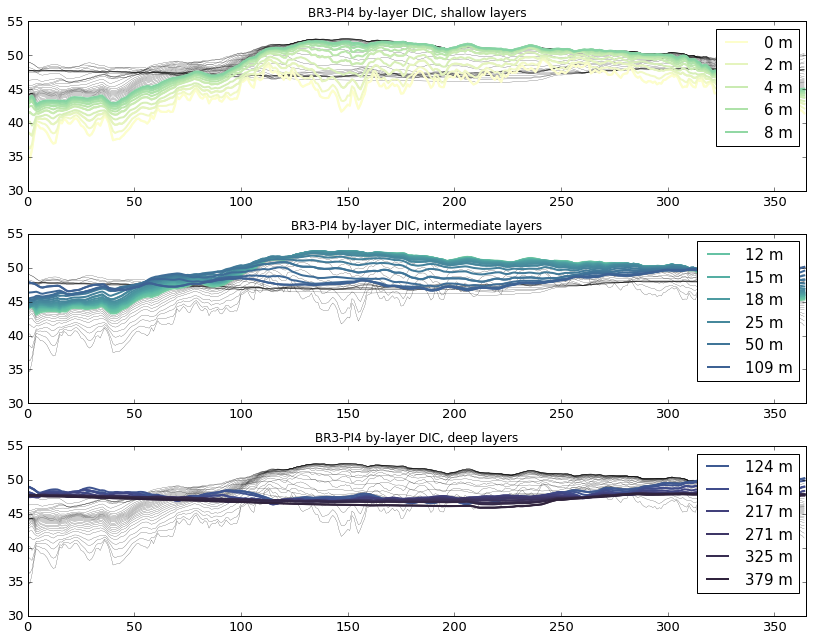

In [30]:
BR3_means_DIC = pickle.load(open('../pkls/BR3_DIC_means_inletsIN.pkl', 'rb'))
PI4_means_DIC = pickle.load(open('../pkls/PI4_DIC_means_inletsIN.pkl', 'rb'))

BR_var = BR3_means_DIC
PI_var = PI4_means_DIC

tcm = cm.deep
fact = 0.6
fig = plt.figure(figsize=(19*fact,15*fact))
days_in = np.arange(0,365*1,1)
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depth = mesh['e3t_0'][0,:,250,250]

ax = fig.add_subplot(3,1,1)


for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = 'k', linewidth = 0.2)

for i in range(0,10):    
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = tcm(1.*i/40), linewidth = 2)
    if i%2 == 0:
        ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = tcm(1.*i/40), linewidth = 2, label = str(int(zdepth)) + ' m')
    ax.legend(bbox_to_anchor = [1,1], fontsize = 15)
ax.set_xlim([0,365])
plt.title('BR3-PI4 by-layer DIC, shallow layers')

ax = fig.add_subplot(3,1,2)


for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = 'k', linewidth = 0.2)

for i in range(10,28):    
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = tcm(1.*i/40), linewidth = 2)
    if i%3 == 0:
        ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = tcm(1.*i/40), linewidth = 2, label = str(int(zdepth)) + ' m')
    ax.legend(bbox_to_anchor = [1,1], fontsize = 15)
ax.set_xlim([0,365])
plt.title('BR3-PI4 by-layer DIC, intermediate layers')

ax = fig.add_subplot(3,1,3)

for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = 'k', linewidth = 0.2)

for i in range(28,40):    
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = tcm(1.*i/40), linewidth = 2)
    if i%2 == 0:
        ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = tcm(1.*i/40), linewidth = 2, label = str(int(zdepth)) + ' m')
    ax.legend(bbox_to_anchor = [1,1], fontsize = 15)
ax.set_xlim([0,365])
plt.title('BR3-PI4 by-layer DIC, deep layers')

plt.tight_layout()